In [2]:
!pip install dash pandas plotly


In [3]:
pip install geopandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import geopandas as gpd

# Load Library Branch General Information
library_branches = pd.read_csv("./tpl-branch-general-information-2023.csv")

# Load Seniors 2017 Survey Data
seniors_survey = pd.read_excel("./seniors-survey-2017-results.xlsx")

# Load Library Branch Programs & Events Feed
branch_programs_events = pd.read_csv("./tpl-events-feed (1).csv")

# Load Parks and Recreation Facilities Locations
parks_facilities = gpd.read_file("./Parks and Recreation Facilities.geojson")

# Load All Types of Schools Locations
schools_locations = gpd.read_file("./School locations-all types data.geojson")

# Load Neighbourhood Profiles
neighbourhood_profiles = pd.read_excel("./neighbourhood-profiles-2021-158-model.xlsx")

# Preprocess datasets as needed
# (e.g., data cleaning, merging, feature engineering)


In [5]:
# Display basic information about each dataset
print("Library Branch General Information:")
print(library_branches.info())
print("\nSeniors 2017 Survey Data:")
print(seniors_survey.info())
print("\nLibrary Branch Programs & Events Feed:")
print(branch_programs_events.info())
print("\nParks and Recreation Facilities Locations:")
print(parks_facilities.head())
print("\nAll Types of Schools Locations:")
print(schools_locations.head())
print("\nNeighbourhood Profiles:")
print(neighbourhood_profiles.info())


Library Branch General Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   _id                   112 non-null    int64  
 1   BranchCode            112 non-null    object 
 2   PhysicalBranch        112 non-null    int64  
 3   BranchName            112 non-null    object 
 4   Address               103 non-null    object 
 5   PostalCode            103 non-null    object 
 6   Website               108 non-null    object 
 7   Telephone             105 non-null    object 
 8   SquareFootage         110 non-null    object 
 9   PublicParking         100 non-null    object 
 10  KidsStop              100 non-null    float64
 11  LeadingReading        100 non-null    float64
 12  CLC                   100 non-null    float64
 13  DIH                   100 non-null    float64
 14  TeenCouncil           100 non-null    

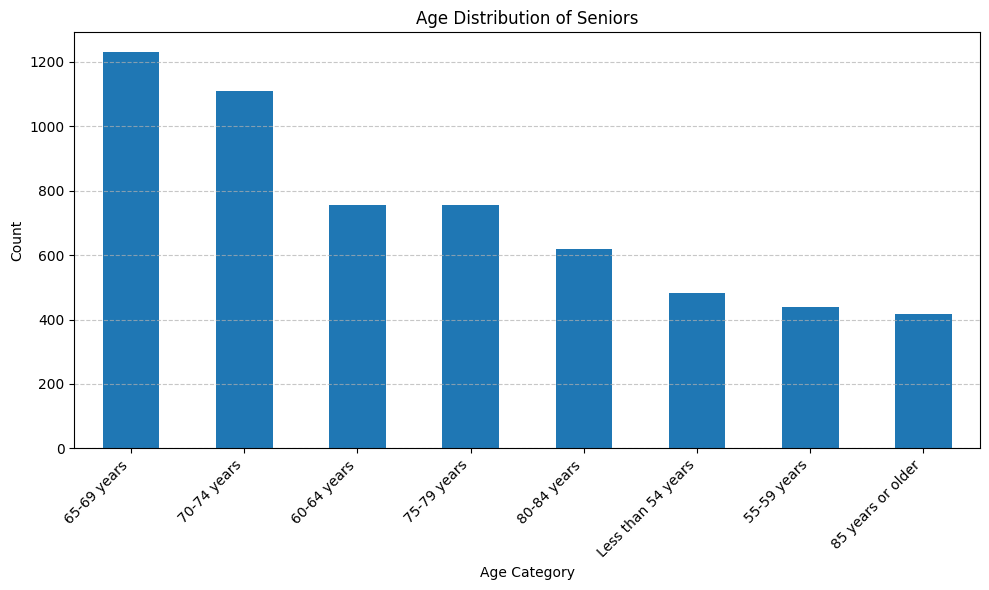

In [6]:
import matplotlib.pyplot as plt

# Extracting age distribution
age_distribution = seniors_survey['19. Which age category do you belong to?'].value_counts()

# Plotting age distribution
plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar')
plt.title('Age Distribution of Seniors')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


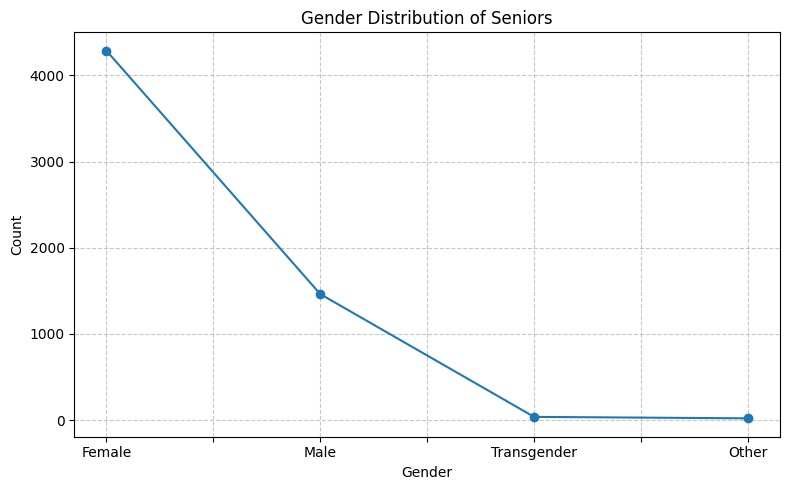

In [9]:
# Extracting gender distribution
gender_distribution = seniors_survey['16. What is your sex/gender?'].value_counts()
# Plotting gender distribution with line graph
plt.figure(figsize=(8, 5))
gender_distribution.plot(kind='line', marker='o')
plt.title('Gender Distribution of Seniors')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


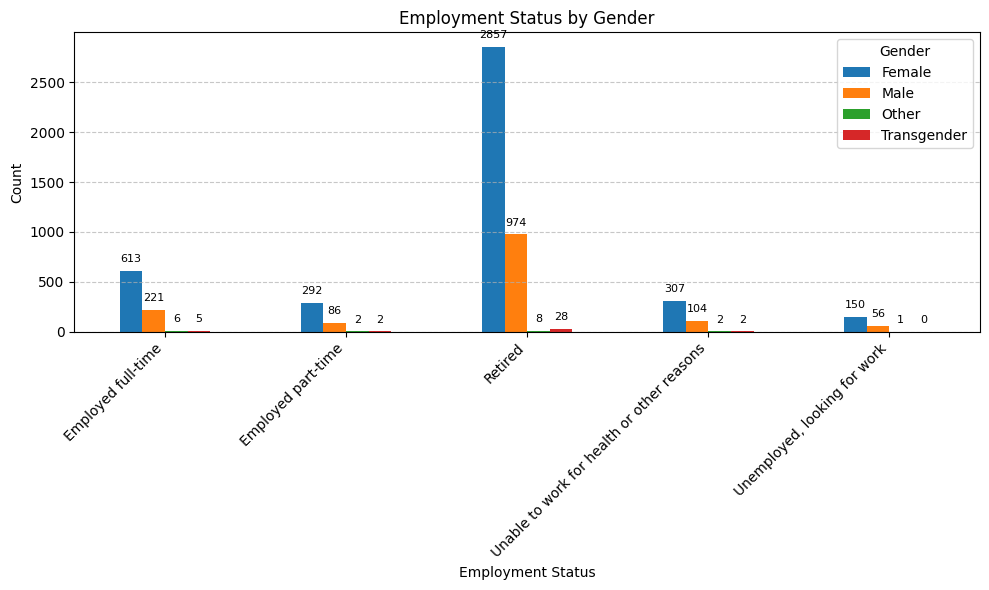

In [11]:
# Creating a cross-tabulation of Employment Status and Gender
employment_gender_cross = pd.crosstab(seniors_survey['15. What is your current employment status?'], seniors_survey['16. What is your sex/gender?'])

# Plotting the cross-tabulation as a bar chart
ax = employment_gender_cross.plot(kind='bar', figsize=(10, 6))
plt.title('Employment Status by Gender')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotating the bars with data points
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()



C:\Users\maild\AppData\Local\Temp\ipykernel_14716\1813926596.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seniors_data.dropna(inplace=True)


<Figure size 1200x600 with 0 Axes>

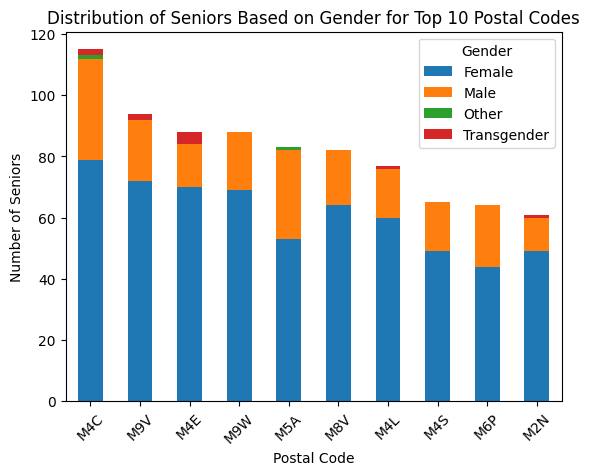

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
# Filter out the relevant columns
seniors_data = seniors_survey[['14. What are the first three characters of your postal code?', '16. What is your sex/gender?']]

# Drop rows with missing values
seniors_data.dropna(inplace=True)

# Count the occurrences of each postal code and gender
postal_gender_counts = seniors_data.groupby(['14. What are the first three characters of your postal code?', '16. What is your sex/gender?']).size().unstack(fill_value=0)

# Select the top 10 postal codes
top_10_postal_codes = postal_gender_counts.sum(axis=1).nlargest(10).index

# Filter the postal_gender_counts dataframe for the top 10 postal codes
top_10_postal_gender_counts = postal_gender_counts.loc[top_10_postal_codes]

# Plot the distribution of seniors based on gender for the top 10 postal codes
plt.figure(figsize=(12, 6))
top_10_postal_gender_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of Seniors Based on Gender for Top 10 Postal Codes')
plt.xlabel('Postal Code')
plt.ylabel('Number of Seniors')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()
